# Visualization with Matplotlib
Library: matplotlib.pyplot 
Using Matplotlib to visualize the Dow Jones Industrial Average stock data (DJIA)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from datetime import datetime

In [2]:
df = pd.read_csv('data/djia.csv')
df.head()

,Date,Open,High,Low,Close
0,10/31/23,33029.11,33070.28,32787.12,33052.87
1,10/30/23,32537.54,33002.97,32537.54,32928.96
2,10/27/23,32782.40,32787.56,32327.20,32417.59
3,10/26/23,33017.17,33105.03,32743.99,32784.30
4,10/25/23,33203.53,33267.91,32989.72,33035.93


In [3]:
#See general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    209 non-null    object 
 1    Open   209 non-null    float64
 2    High   209 non-null    float64
 3    Low    209 non-null    float64
 4    Close  209 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.3+ KB


* Date: date of stock 
* Open: open price at 9:30 AM ET when stock market opens
* Close: close price at 4:00 PM ET when stock market closes
* High: the highest price of stock during a day
* Low: the lowest price of stock during a day

In [4]:
df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')

In [5]:
#Because columns have space, we need to remove it to continue
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [6]:
#Change Date type and arrange 
df['Date'] = pd.to_datetime(df['Date'])
df.head()

/var/folders/nq/2kwnsz3s0_n7jq2trb91l5_40000gn/T/ipykernel_78625/2043297216.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close
0,2023-10-31,33029.11,33070.28,32787.12,33052.87
1,2023-10-30,32537.54,33002.97,32537.54,32928.96
2,2023-10-27,32782.40,32787.56,32327.20,32417.59
3,2023-10-26,33017.17,33105.03,32743.99,32784.30
4,2023-10-25,33203.53,33267.91,32989.72,33035.93


# Histogram
A histogram is a graph that shows the frequency of numerical data using rectangles 

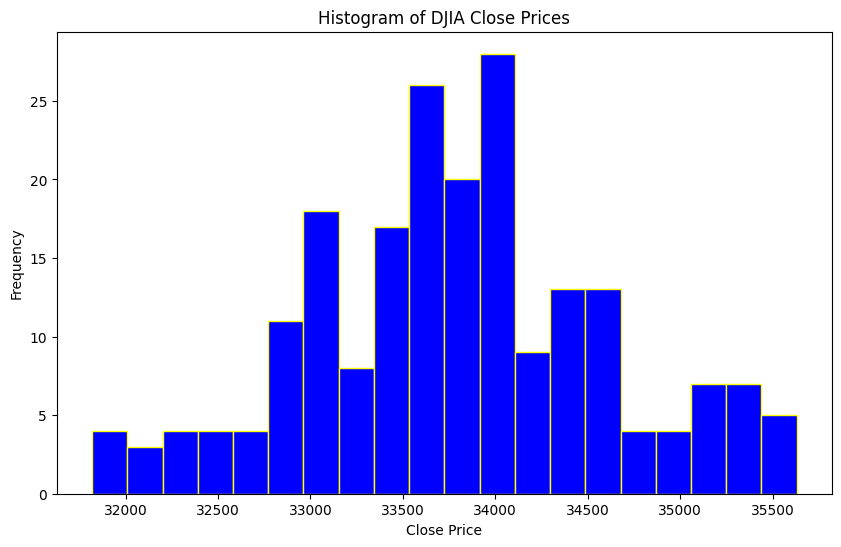

In [8]:
# Draw Histogram of open-close price
plt.figure(figsize=(10,6))
plt.hist(data = df, x = 'Close', bins=20, color = 'blue',edgecolor = 'yellow')
plt.title('Histogram of DJIA Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

The histogram chart shows that the prices ranging from 33,500 to 34,000 have the highest frequency, while 32,000 is less frequent compared to the others.

# Lineplot
A line graph—also known as a line plot or a line chart—is a graph that uses lines to connect individual data points.

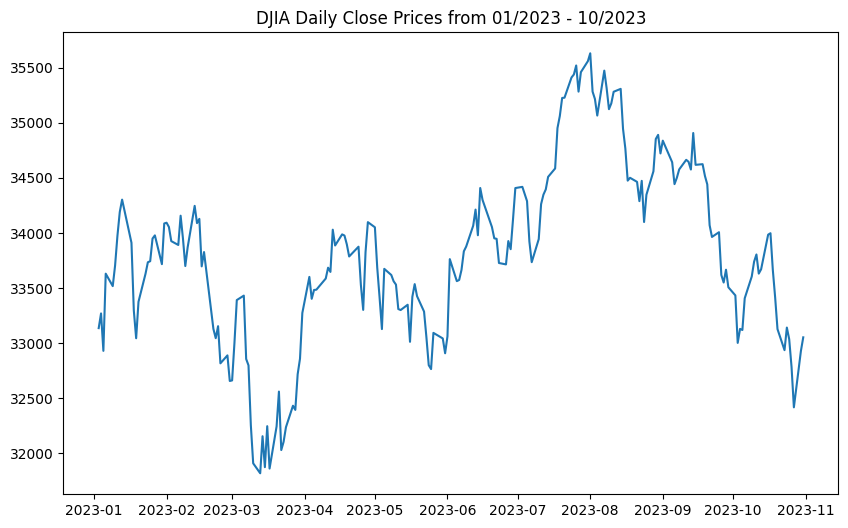

In [13]:
#draw close price line plot
plt.figure(figsize=(10,6))
plt.plot('Date','Close',data = df)
plt.title("DJIA Daily Close Prices from 01/2023 - 10/2023")
plt.show()

The lineplot chart is also formatted by another arguments such as color to change color, maker to change line shape.

## Line plots with Mutilple Lines

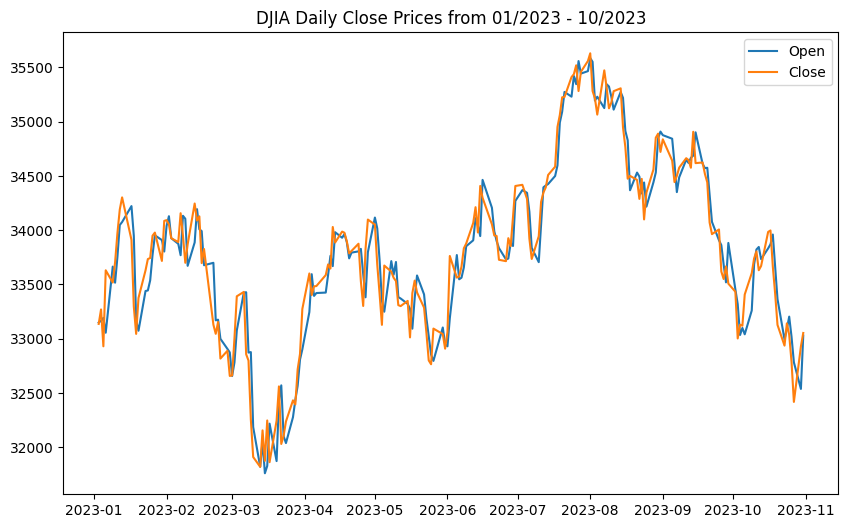

In [14]:
#Draw open and close lineplot
plt.figure(figsize=(10,6))
plt.plot(df['Date'],df['Open'],label='Open')
plt.plot(df['Date'],df['Close'],label = 'Close')
plt.legend()
plt.title('DJIA Daily Close Prices from 01/2023 - 10/2023')
plt.show()

# Bar plot
Bar plot allow to compare different sets of data among different groups easily

In [15]:
# Create Month which displays month name
df['Month'] = df['Date'].dt.month_name()
df['Month_num'] = df['Date'].dt.month
df

,Date,Open,High,Low,Close,Month,Month_num
0,2023-10-31,33029.11,33070.28,32787.12,33052.87,October,10
1,2023-10-30,32537.54,33002.97,32537.54,32928.96,October,10
2,2023-10-27,32782.40,32787.56,32327.20,32417.59,October,10
3,2023-10-26,33017.17,33105.03,32743.99,32784.30,October,10
4,2023-10-25,33203.53,33267.91,32989.72,33035.93,October,10
...,...,...,...,...,...,...,...
204,2023-01-09,33664.39,33935.11,33487.66,33517.65,January,1
205,2023-01-06,33055.30,33710.66,32997.39,33630.61,January,1
206,2023-01-05,33191.72,33191.72,32812.33,32930.08,January,1
207,2023-01-04,33165.14,33409.10,33033.48,33269.77,January,1


In [16]:
#Group by month and calculate the mean value
df_monthly_mean = df.groupby(['Month', 'Month_num'], as_index=False).mean(numeric_only=True)
df_monthly_mean

,Month,Month_num,Open,High,Low,Close
0,April,4,33674.288421,33832.691579,33549.615789,33731.280526
1,August,8,34915.545652,35076.850870,34750.499130,34880.656957
2,February,2,33696.416316,33844.902632,33438.562105,33648.256316
3,January,1,33594.735000,33823.690000,33390.498500,33656.000500
4,July,7,34731.967500,34898.006000,34646.135500,34777.200000
5,June,6,33828.082857,34001.955714,33727.557143,33904.976190
6,March,3,32477.036957,32694.497826,32249.975217,32483.478261
7,May,5,33372.439091,33480.161364,33150.101364,33316.802273
8,October,10,33347.390909,33512.733636,33150.617273,33319.492727
9,September,9,34386.032500,34493.456000,34210.815500,34318.891000


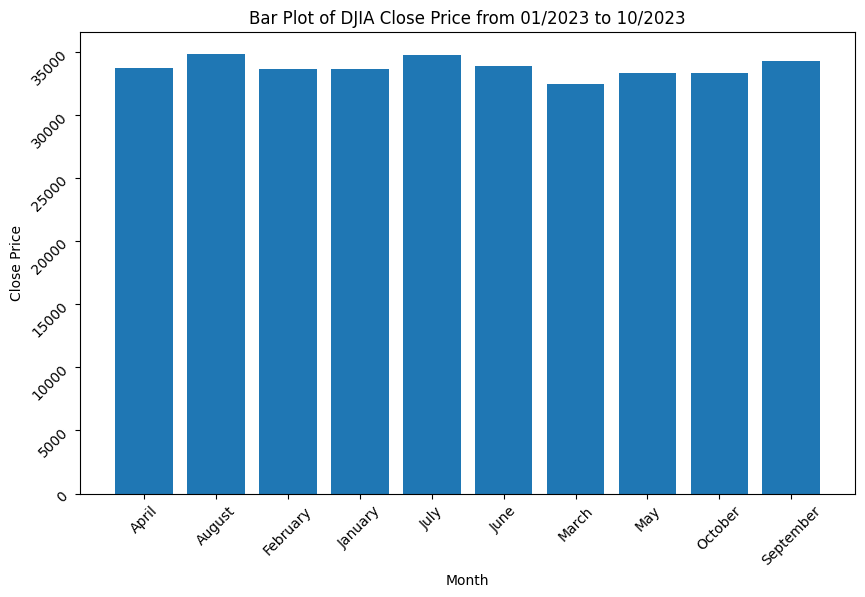

In [18]:
#draw barchart showing close price per month
plt.figure(figsize=(10,6))
plt.bar(height='Close',x='Month',data=df_monthly_mean)
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('Bar Plot of DJIA Close Price from 01/2023 to 10/2023')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

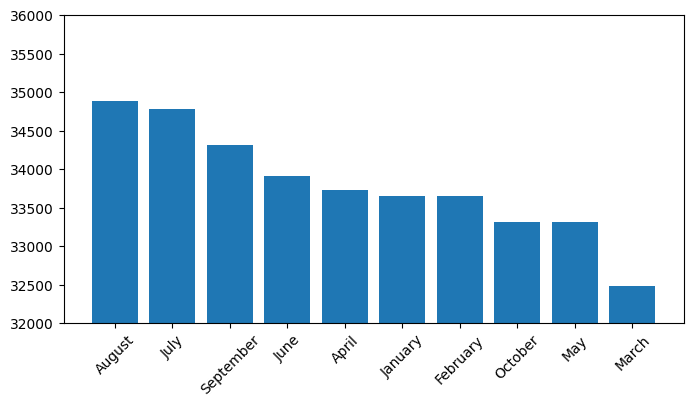

In [20]:
#sort Close price decending
df_monthly_mean.sort_values(by='Close', ascending=False,inplace=True)
plt.figure(figsize=(8,4))
plt.bar(x = 'Month', height='Close', data=df_monthly_mean)
plt.ylim(32000,36000)
plt.xticks(rotation=45)
plt.show()

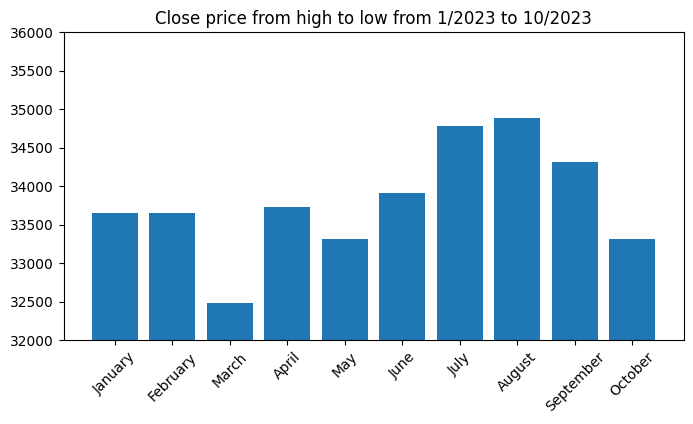

In [23]:
#sort by month
df_monthly_mean.sort_values(by='Month_num', ascending=True,inplace=True)
plt.figure(figsize=(8,4))
plt.bar(x = 'Month', height='Close', data=df_monthly_mean)
plt.ylim(32000,36000)
plt.xticks(rotation=45)
plt.title("Close price from high to low from 1/2023 to 10/2023")
plt.show()

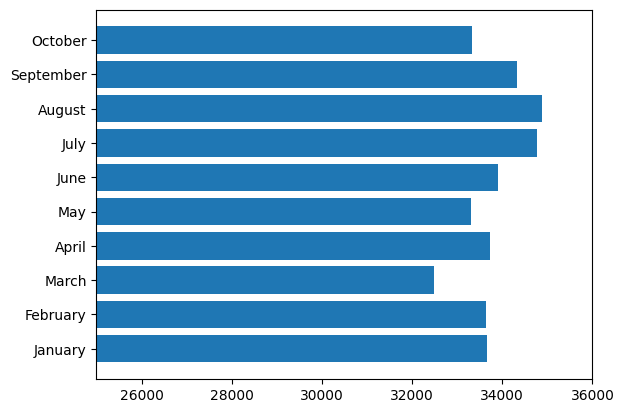

In [24]:
#We can draw barh 
plt.barh('Month',width='Close',data=df_monthly_mean)
plt.xlim(25000,36000)
plt.show()

# Scatter Plot
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables.

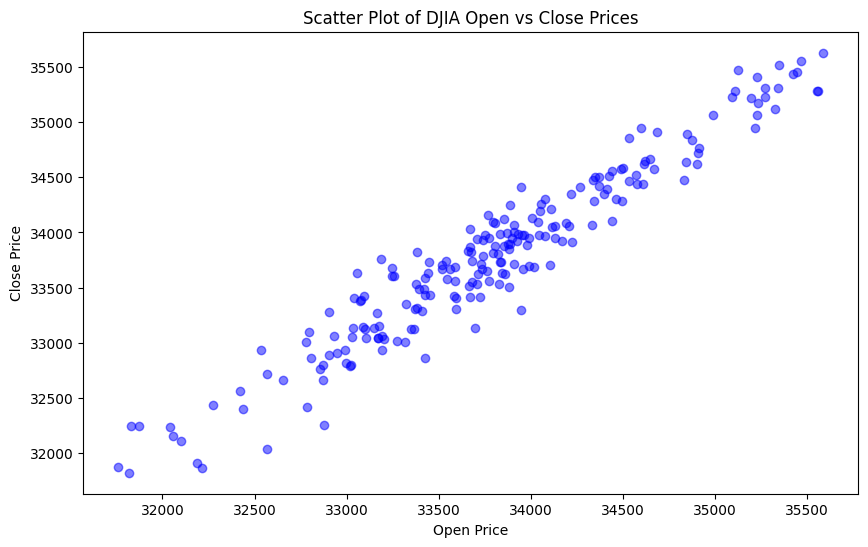

In [25]:
plt.figure(figsize=(10,6))
plt.scatter('Open','Close',data = df,alpha=0.5,color='blue')
plt.title('Scatter Plot of DJIA Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()